Dataset : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


### Our goal is to predict , when customer service representative call the customer, will they subscribe for a bank term deposit or not?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.columns = ['age', 'job', 'marital', 'education', 'credit', 'housing', 'loan','contact', 'month', 'day_of_week',
              'duration', 'campaign', 'pdays','previous', 'poutcome', 'emp.var.rate', 'cons.price.idx','cons.conf.idx',
              'euribor3m', 'nr.employed', 'subscribed']
df.head()


,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
credit            0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

We dont have any null values, so no need to do any imputation or anything

## Label Encoding

{'job': {'housemaid': 1, 'unemployed': 0, 'entrepreneur': 4, 'blue-collar': 1, 'services': 3, 'admin.': 2, 'technician': 2, 'retired': 1, 'management': 4, 'self-employed': 3, 'unknown': 1, 'student': 0.5}}
{'education': {'basic.4y': 1, 'basic.6y': 1, 'basic.9y': 1, 'high.school': 1, 'professional.course': 2, 'university.degree': 2, 'illiterate': 0.9, 'unknown': 0.9}}
{'poutcome': {'nonexistent': 0, 'failure': 0, 'success': 1}}
{'y': {'no': 0, 'yes': 1}}

In [4]:
# Let's find out the categorical variables first

df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   credit       41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  subscribed   41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [5]:
df.groupby(df['marital']).mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


Job:"housemaid":1,
    "unemployed":0,
    "entrepreneur":4,
    "blue-collar":1,
    "services":3,
    "admin.":2,
    "technician":2,
    "retired":1,
    "management":4,
    "self-employed":3,
    "unknown":1,
    "student":0.5
    
Education:"basic.4y":1,
          "basic.6y":1,
          "basic.9y":1,
          "high.school":1,
          "professional.course":2,
          "university.degree":2,
          "illiterate":0.9,
          "unknown":0.9
outcome:"nonexistent":0,
        "failure":0,
        "success":1
Subscribed:"no":0,
            "yes":1

In [6]:
dict_job = {
    "job":{
        "housemaid":1,
        "unemployed":0,
        "entrepreneur":4,
        "blue-collar":1,
        "services":3,
        "admin.":2,
        "technician":2,
        "retired":1,
        "management":4,
        "self-employed":3,
        "unknown":1,
        "student":0.5
    }}
dict_education = {
    "education":{
        "basic.4y":1,
        "basic.6y":1,
        "basic.9y":1,
        "high.school":1,
        "professional.course":2,
        "university.degree":2,
        "illiterate":0.9,
        "unknown":0.9
    }}
dict_poutcome = {
    "poutcome":{
        "nonexistent":0,
        "failure":0,
        "success":1
    }}
dict_y = {
    "subscribed":{
        "no":0,
        "yes":1
    }}

In [7]:
for i in [dict_job,dict_education,dict_poutcome,dict_y]:
    df.replace(i,inplace=True)

In [8]:
df.head()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,1.0,married,1.0,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3.0,married,1.0,unknown,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3.0,married,1.0,no,yes,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2.0,married,1.0,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3.0,married,1.0,no,no,yes,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [9]:
#Encoding rest of the un ordinal categorical variable 
lc_X1 = LabelEncoder()
lst = ['marital','credit','housing','loan','contact','month','day_of_week']
for i in lst:
    df[i] = lc_X1.fit_transform(df[i])

In [10]:
df.head()
# df.groupby(df['marital']).mean()

,age,job,marital,education,credit,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,1.0,1,1.0,0,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3.0,1,1.0,1,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3.0,1,1.0,0,2,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2.0,1,1.0,0,0,0,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3.0,1,1.0,0,0,2,1,6,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [11]:
#one hot encoding
df_1 = pd.get_dummies(df,
                      columns=['marital','credit','housing','loan','contact','month','day_of_week'],
                      drop_first=True)

In [12]:
print(df_1.shape)
df_1.head()

(41188, 37)


,age,job,education,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4
0,56,1.0,1.0,261,1,999,0,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
1,57,3.0,1.0,149,1,999,0,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
2,37,3.0,1.0,226,1,999,0,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
3,40,2.0,1.0,151,1,999,0,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0
4,56,3.0,1.0,307,1,999,0,0,1.1,93.994,...,0,0,1,0,0,0,1,0,0,0


In [13]:
#Assign Variable
X = df_1.drop(columns = 'subscribed',axis=1).values
y = df_1['subscribed'].values 
#split training - test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [15]:
#ANN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [16]:
classifier = Sequential()

##### Hyperparams
* units — number of nodes for first layer
* activation — activation function we use hidden layers
* kernel_initializer — initiating weight as close as 0
* input_dim — number of independent variable in our dataset

In [17]:
classifier.add(Dense(units=13,activation='relu',kernel_initializer='uniform',input_dim=36))
classifier.add(Dropout(rate=0.1))

In [18]:
classifier.add(Dense(units=13,activation='relu',kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))

In [19]:
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [20]:
#compile ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',
                  metrics=['accuracy'])

#####  Hyperparams

* batch_size — number of sample it takes for each iteration
* epochs — number of iteration to optimise the model

In [21]:
#fitting ANN

print(X_train.shape, y_train.shape)

classifier.fit(x=X_train, y=y_train, batch_size=10,epochs=100)

(32950, 36) (32950,)
Epoch 1/100
3295/3295 [==============================] - 2s 509us/step - loss: 0.2198 - accuracy: 0.8973
Epoch 2/100
3295/3295 [==============================] - 1s 440us/step - loss: 0.1912 - accuracy: 0.9098
Epoch 3/100
3295/3295 [==============================] - 1s 440us/step - loss: 0.1896 - accuracy: 0.9112
Epoch 4/100
3295/3295 [==============================] - 1s 438us/step - loss: 0.1877 - accuracy: 0.9110
Epoch 5/100
3295/3295 [==============================] - 1s 413us/step - loss: 0.1871 - accuracy: 0.9118
Epoch 6/100
3295/3295 [==============================] - 1s 403us/step - loss: 0.1869 - accuracy: 0.9118
Epoch 7/100
3295/3295 [==============================] - 1s 404us/step - loss: 0.1856 - accuracy: 0.9123
Epoch 8/100
3295/3295 [==============================] - 1s 410us/step - loss: 0.1852 - accuracy: 0.9138
Epoch 9/100
3295/3295 [==============================] - 1s 402us/step - loss: 0.1840 - accuracy: 0.9131
Epoch 10/100
3295/3295 [==========

3295/3295 [==============================] - 1s 445us/step - loss: 0.1774 - accuracy: 0.9171
Epoch 79/100
3295/3295 [==============================] - 1s 432us/step - loss: 0.1758 - accuracy: 0.9204
Epoch 80/100
3295/3295 [==============================] - 1s 424us/step - loss: 0.1753 - accuracy: 0.9204
Epoch 81/100
3295/3295 [==============================] - 2s 546us/step - loss: 0.1765 - accuracy: 0.9174
Epoch 82/100
3295/3295 [==============================] - 2s 559us/step - loss: 0.1762 - accuracy: 0.9188
Epoch 83/100
3295/3295 [==============================] - 2s 500us/step - loss: 0.1762 - accuracy: 0.9197
Epoch 84/100
3295/3295 [==============================] - 1s 430us/step - loss: 0.1749 - accuracy: 0.9186
Epoch 85/100
3295/3295 [==============================] - 2s 474us/step - loss: 0.1759 - accuracy: 0.9191
Epoch 86/100
3295/3295 [==============================] - 2s 499us/step - loss: 0.1760 - accuracy: 0.9192
Epoch 87/100
3295/3295 [==============================] - 2

In [22]:
y_pred = classifier.predict(X_test)
print(f"y_pred: {y_pred}")

"""
y_pred array contains boolean value of whether dependent variable has more than 50% chance of being ‘yes’ or not.

If ‘yes’ it will be True, if ‘no’ it will be ‘False’.
"""
y_pred = y_pred > 0.5  
print(f"y_pred2: {y_pred}")

y_pred: [[7.6603435e-05]
 [3.3880813e-05]
 [2.9631587e-06]
 ...
 [1.5853841e-06]
 [1.0746496e-04]
 [6.2199336e-01]]
y_pred2: [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [ True]]


# Confusion Matrix

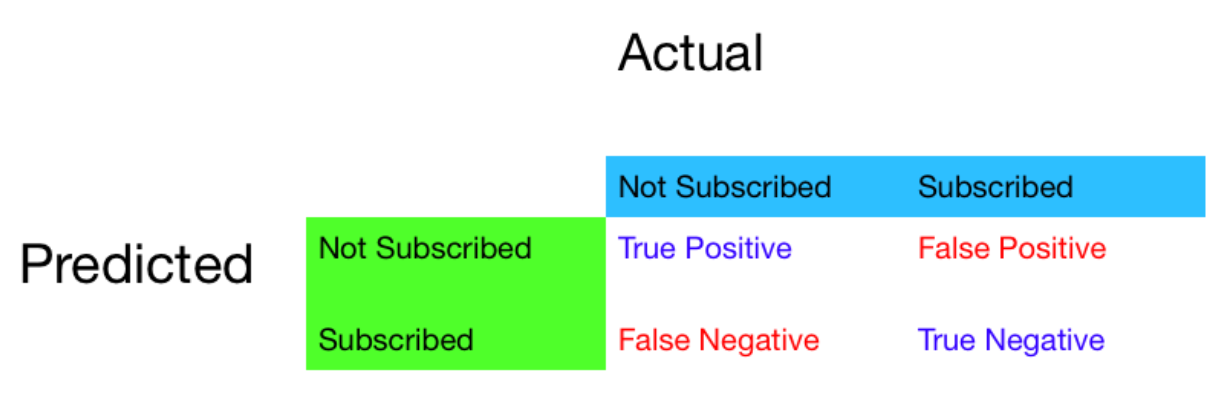

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(f"cm: {cm}")
df = pd.DataFrame(cm)
df

cm: [[6977  302]
 [ 435  524]]


,0,1
0,6977,302
1,435,524


In [24]:
# THis is not the right Way to do it,I will update this lateron...
print(f"TP: {df[0][0]} ")
print(f"TN: {df[1][1]} ")
print(f"FP: {df[1][0]} ")
print(f"FN: {df[0][1]} ")

TP: 6977 
TN: 524 
FP: 302 
FN: 435 
